# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Palaniappan Muthukkaruppan
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Any code is allowed from the class text books or class provided code.__
- Please do not change the file names. The FAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and FAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`).

In [1]:
# import packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Basic Python programming (30 pts)

**Question 1.1 (10 pts)** Reverse the words in a sentence. Implement a function `scramble_sentence` that takes a sentence as a string and returns a string where the words have been reversed. For example, `scramble_sentence("Hello World")` should return `"olleH dlroW"`. Consider that strings are just like any other sequence such as lists and tuples and therefore can be accessed with the slice notation. Also you can use the method `slice` of string object to split a sentence into its individual words and `join` to put a list of strings inside another string. For example, `" ".join(["hello", "world"])` will create `"hello world"`. You can use list comprehensions or for-loops to solve this problem.

In [2]:
# Create the function scramble_sentence below
# YOUR CODE HERE
def scramble_sentence(a):
    words = a.split(" ")
    newWord = [i[::-1] for i in words]
    newSentence = " ".join(newWord)
    return newSentence

In [3]:
#alternative method
def scramble_sentence(a):
    newReverse = a[::-1] #red NINI eeGeeG
    newReversedList = newReverse.split(' ')[::-1] #[eeGeeG, NINI, red]
    newSentence = " ".join(newReversedList)
    return newSentence

scramble_sentence("GeeGee ININ der")

'eeGeeG NINI red'

In [4]:
# 10 pts
np.testing.assert_equal(scramble_sentence("Hello World"), "olleH dlroW")
np.testing.assert_equal(scramble_sentence("Data Science"), "ataD ecneicS")

**Question 1.2 (10 pts)** Basic statistics. Create a function `statistic` which receives two parameters: a list of floating point numbers and a statistic. The statistic will be a string containing either `"max"`, `"min"`, or `"average"`. The function will return the provided statistic of the list. For example, `statistic([1.0, 3.5, 6.0], "max")` should return `6.0`, `statistic([1.0, 3.5, 6.0], "min")` should return `1.0`, and `statistic([1.0, 3.5, 6.0], "average")` should return `3.5`. If the statistic provided is not part of min, max, or average, return the string "Error". Don't assume that the list is a numpy array but rather a vanilla Python list.

In [5]:
# create the function statistic here
# YOUR CODE HERE
def statistic(numbers, stat):
    if stat == "max":
        return max(numbers)
    elif stat == "min":
        return min(numbers)
    elif stat == "average":
        return sum(numbers)/len(numbers)
    else:
        return("Error")

In [6]:
# 10 pts
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "max"), 6.0)
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "min"), 1.0)
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "average"), 3.5)
np.testing.assert_equal(statistic([1.0, 3.5, 6.0], "mode"), "Error")

**Question 1.3 (Numpy, 10 pts)** Estimate the value of $\sqrt[3]{3}$ by simulation. In class, we saw an example of how to estimate $ \pi $ using number random generation. In this question, you will estimate the cube root of 3 using a similar idea. 

You can generate uniform random numbers between 0 and 1 using the method `numpy.random.random` in the package `numpy`. For example:

In [7]:
import numpy.random
x = numpy.random.random(size=5)
print(x)

[0.05968529 0.49049117 0.0558318  0.36272742 0.13425592]


`x` has an numpy array of 5 random numbers between 0 and 1. Notice that you can create a list of random numbers between 0 and 2 by simply multiplying `x` by 2:

In [8]:
x*2

array([0.11937059, 0.98098234, 0.1116636 , 0.72545484, 0.26851183])

We will use this fact to estimate the side $r$ of a cube whose volume is 3. It is easy to notice that $r \leq 3$ because $r^3 = 3$. We will use this fact in the simulation. Specifically, we can estimate $\sqrt[3]{3}$ by generating random cubes with sides between 0 and 3 with `numpy`. Then we can estimate the ratio $p$ of times these random cubes have a volume less or equal to 3. This ratio will represent approximately $ p \approx \frac{\sqrt[3]{3}}{3} $ if you look at the overlapping ratio of the sides of the cube (why is this?). Use this fact to estimate $\sqrt[3]{3}$. **Of course do not use `np.power` or a similar function in any of your calculations.** Use a sample of 100000 random numbers.

Below, create the following variables:

- `s`: random sides of your cubes
- `p`: ratio of times the random cubes are less or equal to 3
- ``: your estimation of the cube root of 3 based on `s` and `p`

In [179]:
# Put your answer in this cell. Create variables s, p, and sqrt3of3 here
#1
N = 100000
s = numpy.random.random(size=N)*3

#2
under = s[s**3 <= 3]
p = numpy.true_divide(len(under),N)

#3
sqrt3of3 = p*3

print(p*3)

#check answer
#print(np.power(3, 1/3))

1.43493
1.4422495703074083


In [183]:
# 2 pts
np.testing.assert_equal(type(s), np.ndarray)
np.testing.assert_equal(s.shape, (100000, ))

In [184]:
# 2 pts
np.testing.assert_equal(type(p), np.float64)

In [185]:
# 6 pts
np.testing.assert_almost_equal(sqrt3of3, np.power(3, 1/3), decimal=2)

## Matplotlib (10 pts)

In [186]:
# import needed packages
import matplotlib.pyplot as plt
import numpy as np

Use the following dataset

In [189]:
# create the data
group = np.array(['young', 'old', 'young', 'young', 'young', 'old', 'young', 'old', 'old', 
                  'young', 'young', 'old', 'young', 'young', 'old', 'old', 'old', 'old', 'old', 
                  'young', 'old', 'old', 'young', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 
                  'young', 'young', 'young', 'old', 'young', 'old', 'old', 'old', 'young', 'young', 
                  'old', 'old', 'young', 'old', 'old', 'young', 'old', 'young', 'old', 'young', 'young', 
                  'young', 'old', 'young', 'old', 'old', 'young', 'young', 'old', 'old', 'young', 'old', 
                  'old', 'young', 'young', 'young', 'young', 'young', 'old', 'old', 'old', 'old', 'young', 
                  'old', 'old', 'young', 'old', 'old', 'old', 'old', 'old', 'old', 'young', 'young', 
                  'old', 'young', 'old', 'old', 'old', 'old', 'young', 'young', 'young', 'old',
                  'old', 'young', 'old', 'old', 'young', 'young'])
age = np.array([37.0, 41.0, 42.0, 41.0, 36.0, 46.0, 31.0, 43.0, 46.0, 36.0, 36.0, 43.0, 28.0, 35.0, 
                46.0, 51.0, 41.0, 51.0, 55.0, 38.0, 50.0, 52.0, 44.0, 43.0, 49.0, 52.0, 54.0, 42.0, 
                44.0, 51.0, 33.0, 38.0, 33.0, 47.0, 35.0, 47.0, 46.0, 40.0, 36.0, 35.0, 44.0, 44.0, 
                31.0, 51.0, 44.0, 34.0, 52.0, 36.0, 51.0, 38.0, 39.0, 29.0, 38.0, 42.0, 47.0, 44.0, 
                39.0, 24.0, 51.0, 41.0, 36.0, 41.0, 46.0, 28.0, 24.0, 32.0, 36.0, 36.0, 46.0, 55.0, 
                55.0, 38.0, 36.0, 47.0, 37.0, 29.0, 45.0, 44.0, 45.0, 44.0, 47.0, 44.0, 39.0, 35.0, 
                42.0, 35.0, 39.0, 47.0, 45.0, 41.0, 35.0, 41.0, 34.0, 41.0, 39.0, 34.0, 43.0, 42.0, 
                36.0, 32.0])
income = np.array([38202.0, 44883.0, 42011.0, 35934.0, 35561.0, 42219.0, 35113.0, 42141.0, 41041.0, 
                   38442.0, 37445.0, 40634.0, 32318.0, 37991.0, 43268.0, 45893.0, 39100.0, 48929.0, 
                   47271.0, 36575.0, 44893.0, 49479.0, 37809.0, 41565.0, 43805.0, 43887.0, 49753.0, 
                   41668.0, 38260.0, 47663.0, 35522.0, 37105.0, 34757.0, 41890.0, 40052.0, 42313.0, 
                   40720.0, 37984.0, 40259.0, 33736.0, 45272.0, 42000.0, 31468.0, 51204.0, 40887.0, 
                   38974.0, 46151.0, 35729.0, 48820.0, 42052.0, 35463.0, 32899.0, 42328.0, 44504.0, 
                   45697.0, 42009.0, 41934.0, 31368.0, 47346.0, 39064.0, 35646.0, 41512.0, 46011.0, 
                   30096.0, 27235.0, 32728.0, 39859.0, 40774.0, 46112.0, 49337.0, 51348.0, 36289.0, 
                   40332.0, 47470.0, 36637.0, 31849.0, 40644.0, 44750.0, 47441.0, 40280.0, 44322.0, 
                   43532.0, 39243.0, 34646.0, 39483.0, 38488.0, 38063.0, 43645.0, 40608.0, 37451.0, 
                   33825.0, 38936.0, 36828.0, 40781.0, 40228.0, 34174.0, 38186.0, 41781.0, 31930.0, 
                   34096.0])

**Question 1.4: (5 pts)** Below, plot the histogram of the income of the "old" population. Use the `group` variable to select from `income` the appropriate datapoints.

(array([ 3.,  6.,  8., 11.,  6.,  6.,  5.,  5.,  5.,  2.]),
 array([36289. , 37794.9, 39300.8, 40806.7, 42312.6, 43818.5, 45324.4,
        46830.3, 48336.2, 49842.1, 51348. ]),
 <a list of 10 Patch objects>)

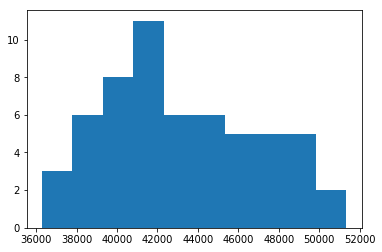

In [195]:
# 5 pts
# YOUR CODE HERE
oldIncome = [income[i] for i in range(len(group)) if group[i] == 'old']

#plot income of old ppl using index number of i
plt.hist(oldIncome)

**Question 1.5:** (5 pts) Produce one scatter plot using `plt.scatter` to depic the relationship between `age` and `income`.  However, put the scatter plot of the 'young' group in green and the 'old' group in 'blue'. **The plot must have a legend describing the groups, a title describing the relationship plotted, and labels for both axes.**

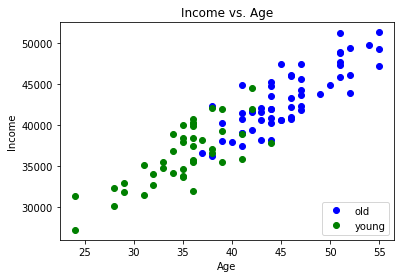

In [220]:
# 5 pts
# YOUR CODE HERE
oldIncome = [income[i] for i in range(len(group)) if group[i] == 'old']
youngIncome = [income[i] for i in range(len(group)) if group[i] == 'young']
oldAge = [age[i] for i in range(len(group)) if group[i] == 'old']
youngAge = [age[i] for i in range(len(group)) if group[i] == 'young']

plt.plot(oldAge, oldIncome, 'o', color ='blue', label = 'old')
plt.plot(youngAge, youngIncome, 'o', color ='green', label = 'young')
plt.title("Income vs. Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(loc=4)

# Pandas (10 pts)

using a modified dataset from above

In [261]:
# import needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create the data
group2 = np.array(['young', 'old', 'young', 'young', 'young', 'old', 'young', 'old', 'old', 'young', 
                   'young', 'old', 'young', 'young', 'old', 'old', 'old', 'old', 'old', 'young', 'old', 
                   'old', 'young', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'young', 'young',
                   'young', 'old', 'young', 'old', 'old', 'old', 'young', 'young', 'old', 'old', 'young', 
                   'old', 'old', 'young', 'old', 'young', 'old', 'young', 'young', 'young', 'old', 'young',
                   'old', 'old', 'young', 'young', 'old', 'old', 'young', 'old', 'old', 'young', 'young',
                   'young', 'young', 'young', 'old', 'old', 'old', 'old', 'young', 'old', 'old', 'young', 
                   'old', 'old', 'old', 'old', 'old', 'old', 'young', 'young', 'old', 'young', 'old', 'old',
                   'old', 'old', 'young', 'young', 'young', 'old', 'old', 'young', 'old', 'old', 'young', 'young'])
age2 = np.array([37.0, 41.0, 42.0, 41.0, 36.0, 46.0, 31.0, 43.0, 46.0, 36.0, 36.0, None, 28.0, 35.0, 
                 46.0, 51.0, 41.0, 51.0, 55.0, 38.0, 50.0, 52.0, 44.0, 43.0, 49.0, 52.0, 54.0, 42.0, 
                 44.0, 51.0, 33.0, 38.0, 33.0, 47.0, 35.0, 47.0, 46.0, 40.0, 36.0, 35.0, 44.0, 44.0, 
                 None, 51.0, 44.0, 34.0, 52.0, 36.0, 51.0, 38.0, 39.0, 29.0, 38.0, 42.0, 47.0, None, 
                 39.0, 24.0, 51.0, 41.0, 36.0, 41.0, 46.0, 28.0, 24.0, 32.0, 36.0, 36.0, 46.0, 55.0, 
                 55.0, 38.0, 36.0, 47.0, 37.0, 29.0, 45.0, 44.0, 45.0, 44.0, 47.0, 44.0, 39.0, 35.0, 
                 42.0, 35.0, 39.0, 47.0, 45.0, 41.0, 35.0, 41.0, 34.0, 41.0, 39.0, 34.0, 43.0, 42.0, 
                 36.0, 32.0], float)
income2 = np.array([38202.0, 44883.0, 42011.0, 35934.0, 35561.0, 42219.0, 35113.0, 42141.0, 41041.0, 
                    38442.0, 37445.0, 40634.0, 32318.0, 37991.0, 43268.0, 45893.0, 39100.0, 48929.0, 
                    47271.0, 36575.0, 44893.0, 49479.0, 37809.0, 41565.0, 43805.0, 43887.0, 49753.0, 
                    41668.0, 38260.0, 47663.0, 35522.0, 37105.0, 34757.0, 41890.0, 40052.0, 42313.0,
                    40720.0, 37984.0, 40259.0, None, 45272.0, 42000.0, 31468.0, 51204.0, 40887.0, 
                    38974.0, 46151.0, 35729.0, 48820.0, 42052.0, 35463.0, 32899.0, 42328.0, 44504.0, 
                    45697.0, 42009.0, 41934.0, 31368.0, 47346.0, 39064.0, 35646.0, 41512.0, 46011.0, 
                    30096.0, 27235.0, 32728.0, 39859.0, 40774.0, 46112.0, 49337.0, 51348.0, 36289.0,
                    None, 47470.0, 36637.0, 31849.0, 40644.0, 44750.0, 47441.0, 40280.0, 44322.0, 
                    43532.0, 39243.0, 34646.0, 39483.0, 38488.0, 38063.0, 43645.0, 40608.0, 37451.0,
                    33825.0, 38936.0, 36828.0, 40781.0, 40228.0, 34174.0, 38186.0, 41781.0, None, 34096.0], float)

**Question 1.6:** (5 pts): Create a dataframe `df` that contains three columns with names `group`, `age`, and `income`, respectively, based on the variables `group2`, `age2`, and `income2` created in the cell above. Use the Pandas DataFrame functionality to compute the mean age and income of each group assign them to `avg_age` and `avg_income`

In [303]:
# Create the variables df, avg_age, and avg_income below
# YOUR CODE HERE
d = {'group':group2, 'age':age2, 'income':income2} #create df using dictionary
df = pd.DataFrame(d)

avg_age = df['age'].mean()
avg_income = df['income'].mean()

In [283]:
# 5 pts
np.testing.assert_equal(set(df.columns), {'age', 'group', 'income'})
np.testing.assert_approx_equal(avg_age, 41.09, significant=1)
np.testing.assert_approx_equal(avg_income, 40452.14, significant=1)

**Question 1.7:** (5 pts) Standardize features. Standardize the age and income in the dataframe from Question 5.1. Standardization is the process of subtracting the mean of a feature and dividing the result by the standard deviation of the feature. Use the Pandas `apply` method or some other method of your choice to perform the stanardization.  Create a variable `df2` with the resulting dataframe.

In [310]:
# create the dataframe df2 here
# YOUR CODE HERE
avg_age = df['age'].mean()
std_age = df['age'].std()
avg_income = df['income'].mean()
std_income = df['income'].std()

df2 = df.copy(deep=True) #create new dataframe df2, deep=True is used so that changes on df2 WON'T affect original df.

df2['age'] = df2['age'].apply(lambda x : (x - avg_age)/std_age)
df2['income'] = df2['income'].apply(lambda x : (x - avg_income)/std_income)
#print("df:\n", df)
#print("df2:\n", df2)

In [309]:
# 5 points
np.testing.assert_equal(set(df2.columns), {'age', 'group', 'income'})
np.testing.assert_almost_equal(df2['age'].mean(), 0)
np.testing.assert_almost_equal(df2['age'].std(), 1, decimal=1)
np.testing.assert_almost_equal(df2['income'].mean(), 0)
np.testing.assert_almost_equal(df2['income'].std(), 1, decimal=1)
np.testing.assert_array_equal(df['group'], df2['group'])